<h1><center>M.Yusuf Raka <br> (09011381621096)

#   

# <center >FIS Pengontrol Keran air ke Tedmond, Bak, dan Kolam Renang.  Serta pembuktiannya dengan mengimplementasikan ke dalam Matlab fuzzy logic designer serta manual kalkulasi
<div style="text-align: justify">Kasus ini saya ambil karena sering sekali terjadi luapan air di tedmond yang diakibatkan oleh ketidaktahuan akan besarnya debit air yang masuk dan seberapa kapasitas penampung air sudah terisi. sehingga jika logika fuzzy ini diterapkan pada installasi air yang ada dirumah atau disebuah hotel yang memiliki kolam berenang, dapat meminimalisir terjadinya luapan air yang sebenarnya tidak perlu terjadi.

<div style="text-align: justify"> Sebagaimana kita ketahui bahwa logika fuzzy di pembahasan ini bukanlah digunakan untuk mengambil keputusan melainkan pengontrol sebuah penggerak untuk mematikan air, maka tentu saja memerlukan perangkat dan sensor yang nantinya akan memberikan inputan ataupun outputan.  perangkat yang digunakan untuk mengimplementasikan logika fuzzy ini adalah sebagai berikut:  </div>
1. Sensor ketinggian permukaan air, digunakan untuk menginput sebuah nilai seberapa kapasitas tedmond/bak/kolam sudah terisi.
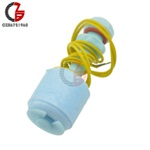
2. Sensor tekanan air, digunakan untuk menginput seberapa besar debit air yang akan masuk.
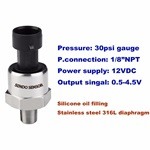
3. Motor servo, digunakan untuk mengontrol keran air.
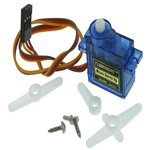

#   

<h1> A. Mengimport header atau library serta pendeklarasian variabel dari setiap header </h1>

Dalam kasus ini library yang digunakan adalah numpy dan skfuzzy. Dimana numpy digunakan untuk mengelola data, sedangkan fuzzy digunakan untuk memetakan grafik serta rule-rule yang nantinya dijadikan kondisi.

In [62]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#   

<h1> B. Variabel linguistik
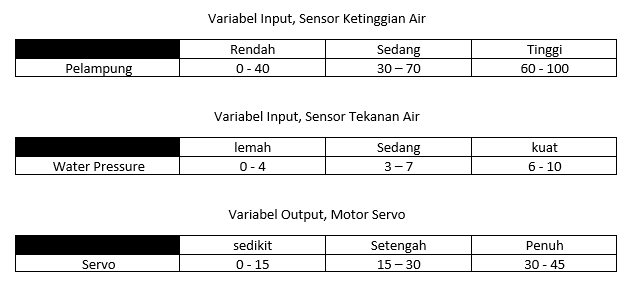
<h2> Variabel yang digunakan terdiri atas 3, yaitu:

<h3> Sensor ketinggian air, memiliki 3 membership function </h3>
1. rendah, ketika nilai sensor water level antara 0 - 40
2. sedang, ketika nilai sensor water level antara 30 - 70
3. tinggi, ketika nilai sensor water level antara 60 - 100

<h3> Sensor tekanan air, memiliki 3 membership function </h3>
1. lemah, ketika nilai sensor tekanan air antara 0 - 4
2. sedang, ketika nilai sensor tekanan air antara 3 - 7
3. kuat, ketika nilai sensor tekanan air antara 6 - 10

<h3> Motor servo, memiliki 3 membership function </h3>
1. sedikit, maka motor servo akan berputar antara 0 - 15 derajat
2. setengah, maka motor servo akan berputar antara 15 - 30 derajat
3. penuh, maka motor servo akan berputar antara 30 - 45 derajat

#   

<h1> C. Proses Fuzzyfikasi </h1>

Ada cukup banyak tipe atau jenis-jenis membership function yang dapat digunakan untuk memvisualisasikan mengenai pengendali fuzzy, setiap tipe tersebut memiliki keunggulan dan kelemahan masing-masing sesuai dengan kasus atau permasalahan yang ingin diselesaikan. berikut macam-macam membership function pada fuzzy inference system:
- Triangle membership function (trimf) --> yang digunakan saat ini
- Trapezoidal membership function (trapmf)
- Generalized Bell membership function (Gbellmf)
- Gaussian membership function (gaussmf)
- Pi membership function (pimf)
- Signoidal membership function (sigmf)
- Dsignoidal membership function (dsigmf)
- Psignoidal membership function (psigmf)
- S membership function (smf)
- Z membership function (zmf)

<h2> 1. Pendeklarasian pelampung sebagai variabel input dari sensor ketinggian air </h2>

Sebelumnya telah dijelaskan bahwa variabel pelampung memiliki 3 membership function, dimana setiap membership function menggunakan fungsi segitiga yang dibuat sesuai dengan persamaan dibawah ini:

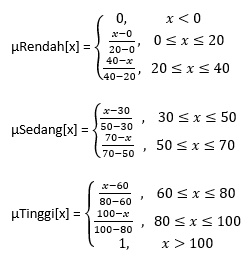

In [63]:
ketinggian = ctrl.Antecedent(np.arange(0, 101, 1), 'level')
ketinggian['rendah'] = fuzz.trimf(ketinggian.universe, [0,20,40])
ketinggian['sedang'] = fuzz.trimf(ketinggian.universe, [30,50,70])
ketinggian['tinggi'] = fuzz.trimf(ketinggian.universe, [60,80,100])

C:\Users\Kampretos\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


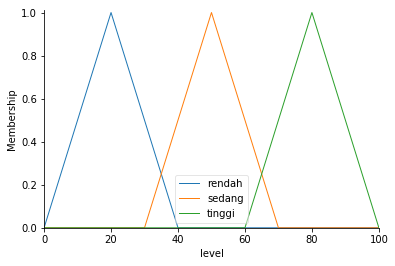

In [64]:
ketinggian.view()

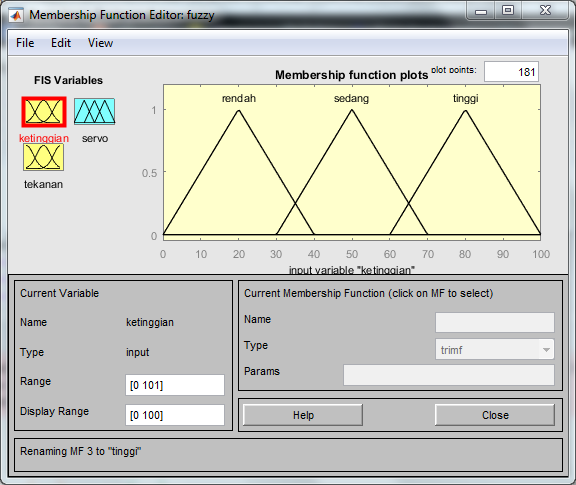

##  

## 2. Pendeklarasian pressure sebagai variabel input dari sensor tekanan air

Juga untuk variabel pressure terdiri atas 3 membership function yang menggunakan fungsi segitiga dengan persamaan dibawah ini:
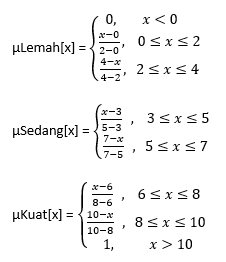

In [65]:
tekanan = ctrl.Antecedent(np.arange(0, 11, 1), 'pressure')
tekanan['lemah'] = fuzz.trimf(tekanan.universe, [0,2,4])
tekanan['sedang'] = fuzz.trimf(tekanan.universe, [3,5,7])
tekanan['kuat'] = fuzz.trimf(tekanan.universe, [6,8,10])

C:\Users\Kampretos\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


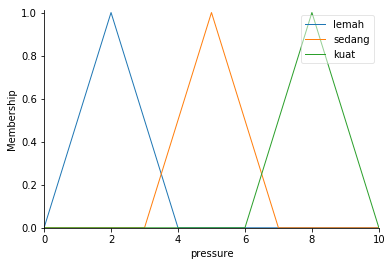

In [66]:
tekanan.view()

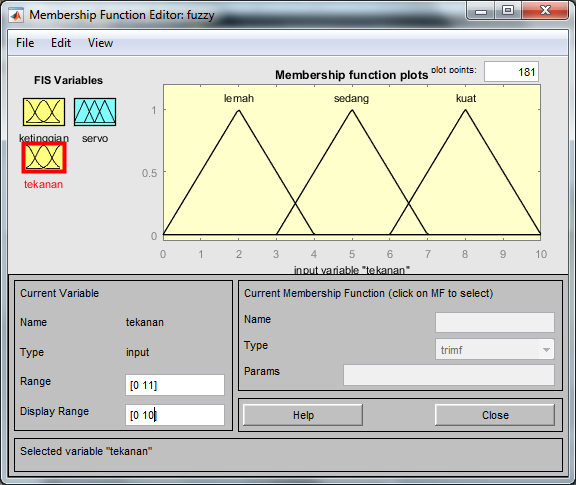

##  

## 3. Pendeklarasian servo sebagai variabel output ke motor servo

Dan variabel yang menjadi output yaitu servo menggunakan fungsi segitiga juga dengan persamaan sebagai berikut:
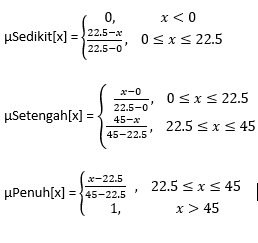

In [67]:
servo = ctrl.Consequent(np.arange(0, 46, 1), 'servo')
servo['sedikit'] = fuzz.trimf(servo.universe, [0, 0, 22.5])
servo['setengah'] = fuzz.trimf(servo.universe, [0, 22.5, 45])
servo['penuh'] = fuzz.trimf(servo.universe, [22.5, 45, 45])

C:\Users\Kampretos\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


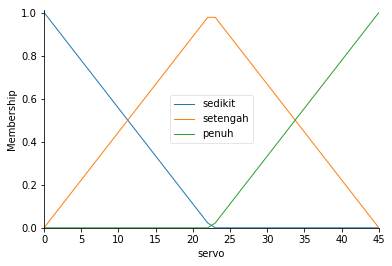

In [68]:
servo.view()

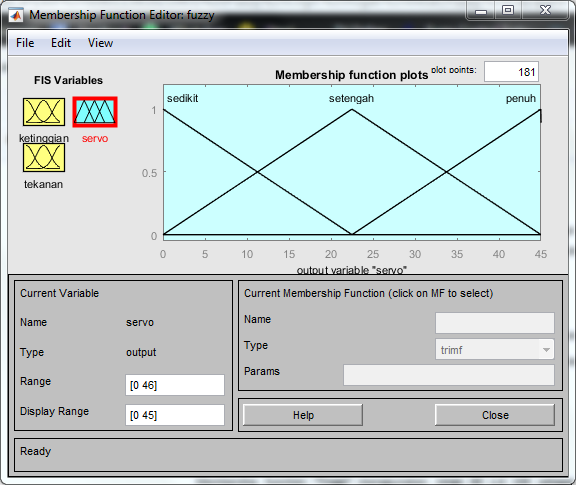

#  

# D. Rule base
Karena pada logika fuzzy ini terdapat 2 input dengan masing-masing terdiri atas 3 membership function, setiap anggota pada input 1 akan bertemu dengan semua anggota pada input 2. sehingga total rule yang akan digunakan untuk rule base pada logika ini adalah
## (membership function input 1) * (membership function input 2)
## 3 x 3 = 9  total rule base

berikut adalah 9 rule yang dibuat sesuai dengan membership function dari setiap input:
1. jika ketinggian "kosong" AND  tekanan "lemah" THEN servo "sedikit"
2. jika ketinggian "kosong" AND  tekanan "sedang" THEN servo "sedikit"
3. jika ketinggian "kosong" AND  tekanan "kuat" THEN servo "setengah"
4. jika ketinggian "sedang" AND  tekanan "lemah" THEN servo "sedikit"
5. jika ketinggian "sedang" AND  tekanan "sedang" THEN servo "setengah"
6. jika ketinggian "sedang" AND  tekanan "kuat" THEN servo "penuh"
7. jika ketinggian "hampir" AND  tekanan "lemah" THEN servo "setengah"
8. jika ketinggian "hampir" AND  tekanan "sedang" THEN servo "setengah"
9. jika ketinggian "hampir" AND  tekanan "kuat" THEN servo "penuh"

Sehingga jika direpresentasikan kedalam tabel maka rule basenya akan seperti berikut:
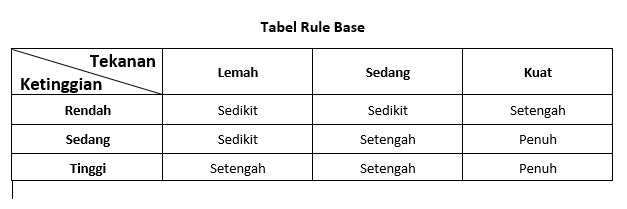

In [69]:
rule1 = ctrl.Rule(ketinggian['rendah'] & tekanan['lemah'], servo['sedikit'])
rule2 = ctrl.Rule(ketinggian['sedang'] & tekanan['lemah'], servo['sedikit'])
rule3 = ctrl.Rule(ketinggian['tinggi'] & tekanan['lemah'], servo['setengah'])
rule4 = ctrl.Rule(ketinggian['rendah'] & tekanan['sedang'], servo['sedikit'])
rule5 = ctrl.Rule(ketinggian['sedang'] & tekanan['sedang'], servo['setengah'])
rule6 = ctrl.Rule(ketinggian['tinggi'] & tekanan['sedang'], servo['penuh'])
rule7 = ctrl.Rule(ketinggian['rendah'] & tekanan['kuat'], servo['setengah'])
rule8 = ctrl.Rule(ketinggian['sedang'] & tekanan['kuat'], servo['setengah'])
rule9 = ctrl.Rule(ketinggian['tinggi'] & tekanan['kuat'], servo['penuh'])

In [70]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

In [71]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

#  

# D. Fuzzy Inference
terdapat 3 metode dalam fuzzy inference system, yaitu Tsukamoto, Mamdani, dan Sugeno. sedangkan metode yang digunakan pada logika fuzzy yang dibuat ini adalah FIS-Mamdani, dimana karakteristiknya adalah sebagai berikut:
1. baik variabel input maupun variabel output dibagi menjadi satu atau lebih himpunan fuzzy.
2. fungsi implikasi yang digunakan adalah MIN.

## KASUS:
Jika diketahui ketinggian air yang telah mengisi tedmond sebesar 60 dan tekanan air yang berasal dari mesin atau PDAM sebesar 5.5 berapa derajatkah keran diputar oleh motor servo?

In [72]:
tipping.input['level'] = 60
tipping.input['pressure'] = 5.5

<h3> PENYELESAIAN </h3>
Untuk menghitung nilai hasil menggunakan metode menggunakan FIS Mamdani, ada 5 langkah yang harus dilakukan yaitu:

In [73]:
tipping.compute()

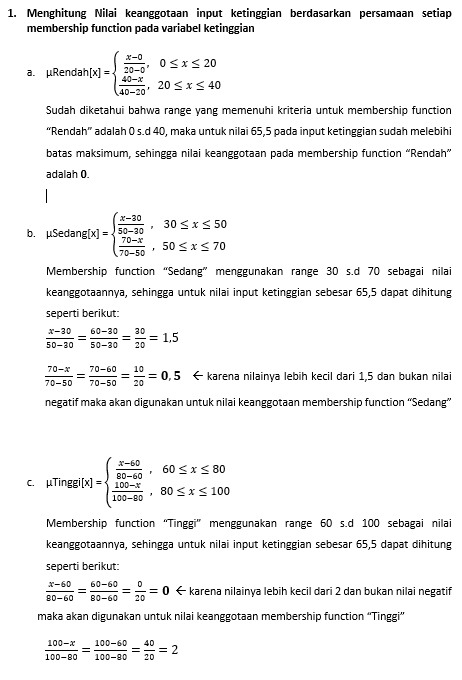
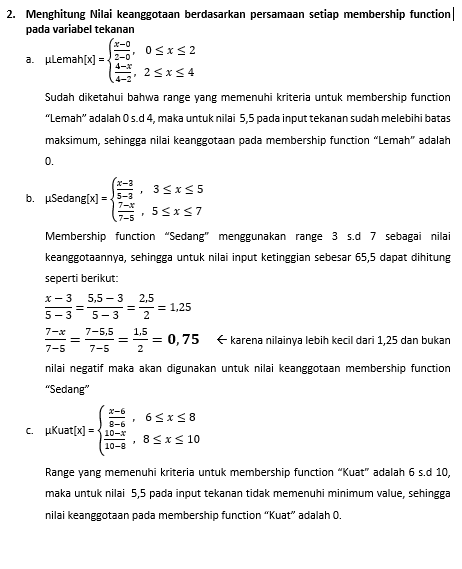
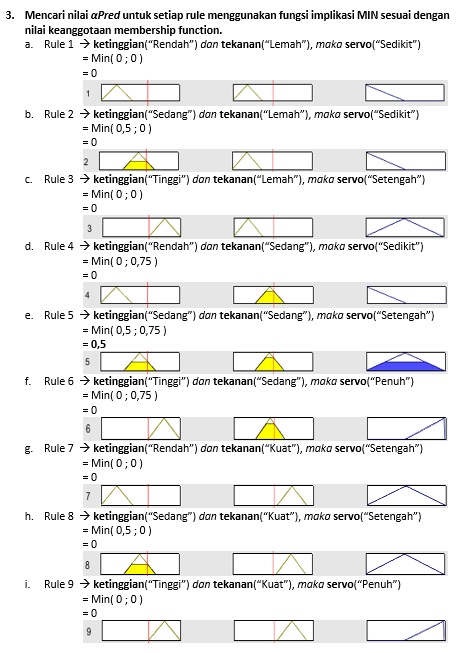
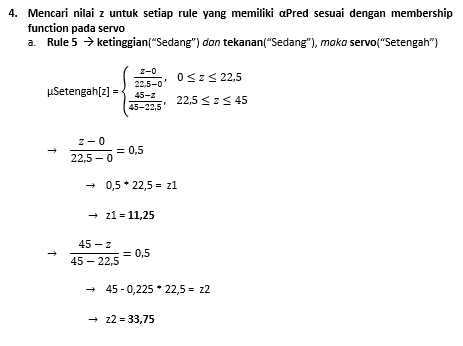
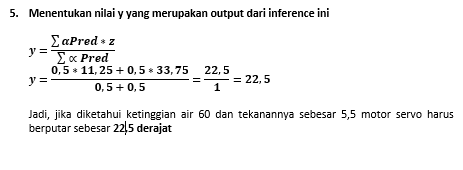

#  

# C. Proses Defuzzyfikasi

##  Output dapat ditampilkan dalam bentuk angka ataupun grafik

22.5


C:\Users\Kampretos\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


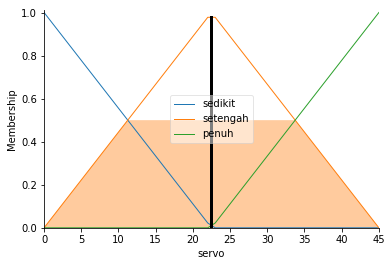

In [74]:
print (tipping.output['servo'])
servo.view(sim=tipping)

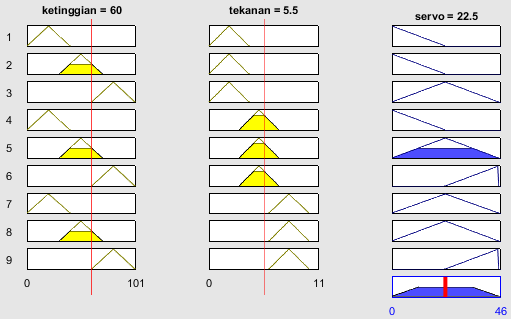